In [49]:
from quilt.data.MarcelColvin import photos
import pandas as pd
import shapely.geometry as geom

In [16]:
file = photos.m_3812101_se_10_h_20160711_txt()

In [13]:
nvdifield = photos.m_3812101_se_10_h_20160711_tif()


In [ ]:
file1 = file.split("\\")[1].strip().replace(".txt", ".tif")

In [26]:

count = 0
dir_df = pd.DataFrame(columns = [ "date", "west", "east", "north", "south"])

with open(file) as f:
        while True:
            text = f.readline()
            if("Calendar_Date:" in text):
                date = text.split(":")[1].strip()
            if("Bounding_Coordinates" in text):
                west = float(f.readline().split(":")[1].strip())
                east = float(f.readline().split(":")[1].strip())
                north = float(f.readline().split(":")[1].strip())
                south = float(f.readline().split(":")[1].strip())
                data1 = pd.DataFrame(data = { "date": date, "west": west, "east":east, "north":north, "south":south}, index = [count])
                dir_df = pd.concat([dir_df, data1])
                count +=1
            break

In [39]:
f = open(file)
text = f.readline()
f.close()

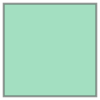

In [81]:
geom.Polygon([[dir_df.loc[i,"west"], dir_df.loc[i, "north"]], [dir_df.loc[i,"east"], dir_df.loc[i, "north"]], [dir_df.loc[i,"east"], dir_df.loc[i, "south"]], [ dir_df.loc[i,"west"],dir_df.loc[i, "south"]]])


In [94]:
okay= dir_df['geometry'][0]
okay.contains()

TypeError: contains() missing 1 required positional argument: 'other'

In [44]:
import geopandas as gpd

In [51]:
dir_df =data1.reset_index(drop = True)
i = 0
#make a shape for each picture
dir_df.loc[i, "geometry"] =geom.Polygon([[dir_df.loc[i,"west"], dir_df.loc[i, "north"]], [dir_df.loc[i,"east"], dir_df.loc[i, "north"]], [dir_df.loc[i,"east"], dir_df.loc[i, "south"]], [ dir_df.loc[i,"west"],dir_df.loc[i, "south"]]])
#convert to geodf
geo_df = gpd.GeoDataFrame(dir_df, geometry = dir_df["geometry"])

In [57]:
from osgeo import gdal
ds = gdal.Open(photos.m_3812101_se_10_h_20160711_tif())

In [60]:
import matplotlib.pyplot as plt

from PIL import Image
img = Image.open(photos.m_3812101_se_10_h_20160711_tif())
plt.imshow(img)

In [63]:
img = Image.open(photos.m_3812101_se_10_h_20160711_tif())

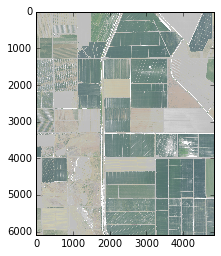

In [65]:
plt.imshow(img)

In [68]:
#%cd fields_corrected/


fields_corrected.cpg  fields_corrected.prj  fields_corrected.shx
fields_corrected.dbf  fields_corrected.shp


In [69]:
data = gpd.read_file('fields_corrected.shp')
data.head()

,OBJECTID,county_num,pk_site_id,site_id,pk_permit_,permit_num,permittee,permit_yr,p_eff_date,p_exp_date,...,loc_narr,is_active,size,size_units,crop_list,calc_acres,mtrs,hq_distric,site_distr,geometry
0,2771691,57,6129265,A14,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT RD,1,15.0,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",8.920299,M07N04E28,57,,POLYGON ((-121.5435143790129 38.43134714591933...
1,3617440,57,6129266,B10,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON BLVD,1,90.0,ACRES,ALFALFA,92.088548,M07N03E24,57,57,POLYGON ((-121.5829806146166 38.43535362263977...
2,2772757,57,6129267,B11,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,JEFFERSON X WILLOWPOINT,1,75.0,ACRES,ALFALFA,77.539027,M07N03E24,57,57,POLYGON ((-121.5897884711797 38.43475678825893...
3,2770898,57,6129268,B12,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT @ DEEP WATER CHANNEL,1,75.0,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",60.747020,M07N03E24,57,57,POLYGON ((-121.5948226102154 38.44296931203907...
4,2770899,57,6129269,B13,760066,570220A,"PYLMAN & SON, JOHN",2016,2016-02-04,2016-12-31,...,WILLOWPOINT X Z-LINE,1,64.0,ACRES,"OAT FOR/FOD, UNCULTIVATED AG",63.385837,M07N03E24,57,57,"POLYGON ((-121.5933455142271 38.4409508416019,..."


In [98]:
okay.contains(data["geometry"])

AttributeError: 'GeoSeries' object has no attribute '_geom'

In [103]:
def container(x):
    This function applies the contain function which determins if the coordinates of crop field are in a photo
    
    return(okay.contains(x))
data['geometry'][data['geometry'].apply(container)]

368      POLYGON ((-121.9141150464039 38.90322495688218...
369      POLYGON ((-121.9044376373931 38.90306846694409...
370      POLYGON ((-121.9138893042052 38.89615006093344...
371      POLYGON ((-121.9138479906751 38.89214489984609...
372      POLYGON ((-121.9137197962461 38.88436968646303...
598      POLYGON ((-121.8812027452457 38.89549313141674...
757      POLYGON ((-121.8903265008207 38.91783811649618...
760      POLYGON ((-121.890135604716 38.9213567694934, ...
815      POLYGON ((-121.9140693201776 38.88417633555705...
816      POLYGON ((-121.9141431522531 38.88025187196261...
1159     POLYGON ((-121.9141150464039 38.90322495688218...
1160     POLYGON ((-121.9044376373931 38.90306846694409...
1161     POLYGON ((-121.9138893042052 38.89615006093344...
1162     POLYGON ((-121.9138479906751 38.89214489984609...
1163     POLYGON ((-121.9137197962461 38.88436968646303...
1168     POLYGON ((-121.9141150464039 38.90322495688218...
1169     POLYGON ((-121.9044376373931 38.90306846694409.